<a href="https://colab.research.google.com/github/Lokesh16122004/Python-Project/blob/main/Project_for_BreastCancer_in_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silhouette Score: 0.5084690190672024


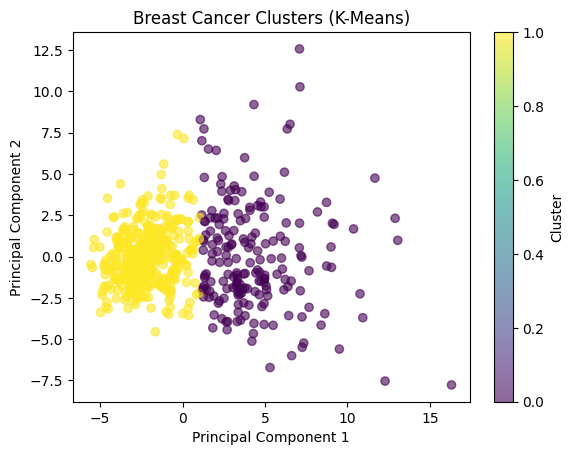

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns=data['feature_names'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # We know there are two primary groups (benign/malignant)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the dataset
X['Cluster'] = clusters

# Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Visualization
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Breast Cancer Clusters (K-Means)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


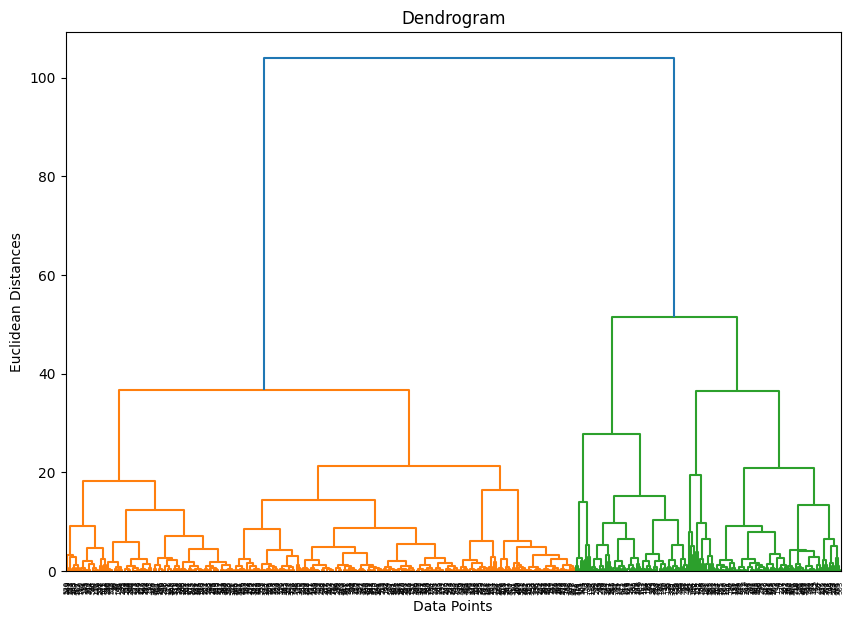

Silhouette Score: 0.5046397728338724
Adjusted Rand Index (ARI): 0.6594271719206948


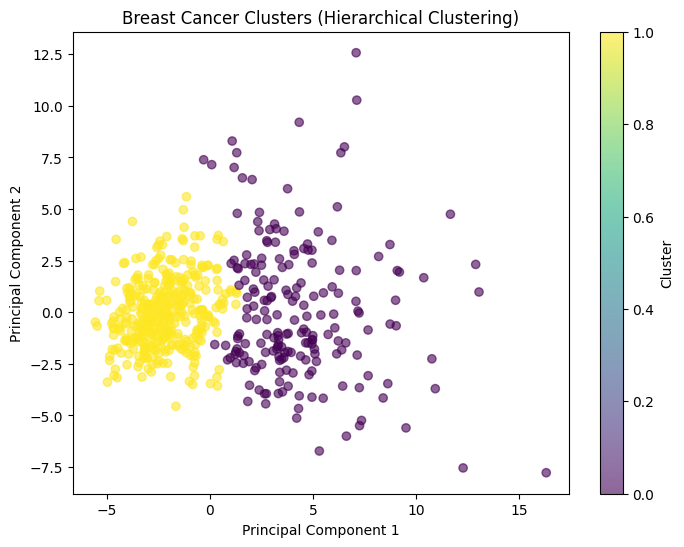

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']  # Actual labels: 0 = malignant, 1 = benign

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Dendrogram to determine the number of clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# Perform Hierarchical Clustering
# Removed the affinity parameter as it's not needed with ward linkage
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters = hierarchical.fit_predict(X_pca)
clusters = hierarchical.fit_predict(X_pca)

# Evaluate clustering
silhouette_avg = silhouette_score(X_pca, clusters)
ari_score = adjusted_rand_score(y, clusters)  # Compare clusters to true labels
print(f"Silhouette Score: {silhouette_avg}")
print(f"Adjusted Rand Index (ARI): {ari_score}")

# Visualization of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Breast Cancer Clusters (Hierarchical Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


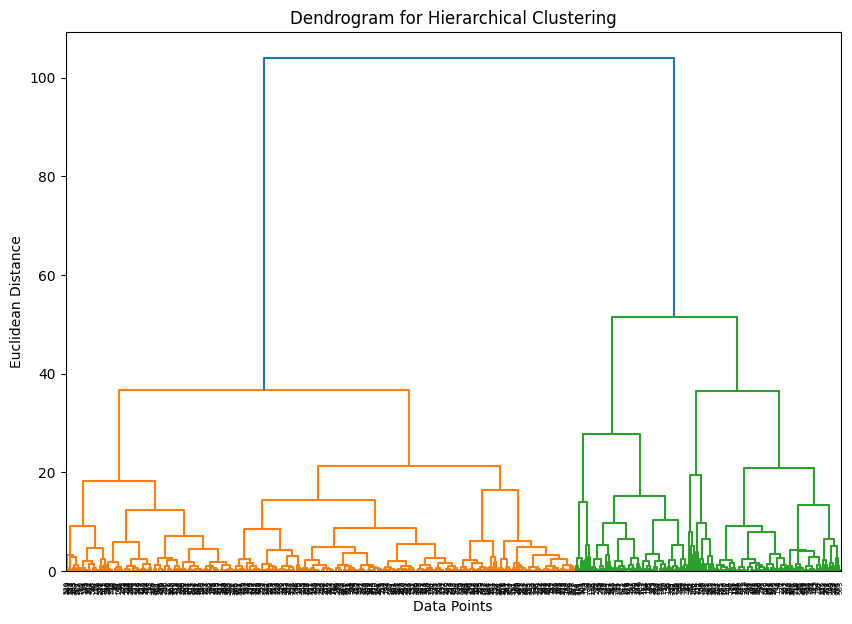

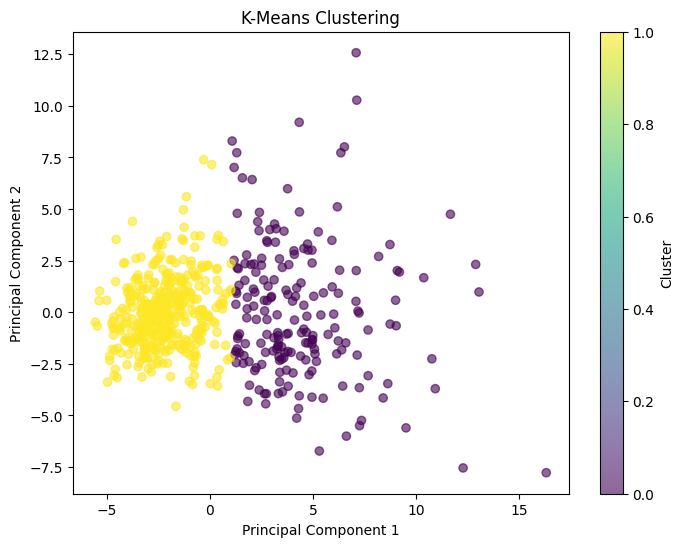

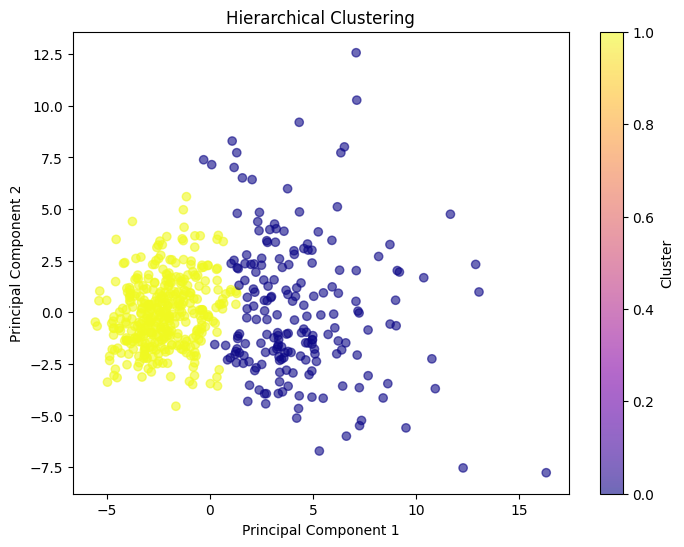

Evaluation Metrics:
K-Means Silhouette Score: 0.51
K-Means Adjusted Rand Index (ARI): 0.66
Hierarchical Silhouette Score: 0.50
Hierarchical Adjusted Rand Index (ARI): 0.66


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Load breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']  # Ground truth labels: 0 (malignant), 1 (benign)

# Step 1: Data Preprocessing
# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Dimensionality Reduction (Optional, for visualization)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Step 3: K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)  # Train the K-Means model
kmeans_clusters = kmeans.predict(X_pca)  # Predict cluster assignments

# Evaluate K-Means Clustering
kmeans_silhouette = silhouette_score(X_pca, kmeans_clusters)
kmeans_ari = adjusted_rand_score(y, kmeans_clusters)

# Step 4: Hierarchical Clustering
# Plot dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Perform Hierarchical Clustering
# Removed the affinity parameter as it's not needed with ward linkage
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(X_pca)
hierarchical_clusters = hierarchical.fit_predict(X_pca)

# Evaluate Hierarchical Clustering
hierarchical_silhouette = silhouette_score(X_pca, hierarchical_clusters)
hierarchical_ari = adjusted_rand_score(y, hierarchical_clusters)

# Step 5: Visualization of Clusters
# K-Means Clustering Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Hierarchical Clustering Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_clusters, cmap='plasma', alpha=0.6)
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 6: Print Evaluation Results
print("Evaluation Metrics:")
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"K-Means Adjusted Rand Index (ARI): {kmeans_ari:.2f}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.2f}")
print(f"Hierarchical Adjusted Rand Index (ARI): {hierarchical_ari:.2f}")
